# Análise dos documentos

In [12]:
import re
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from collections import Counter
from glob import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

sns.set(style="darkgrid")


In [2]:
ROOT = '../..'

DATA_PATH = os.path.join(ROOT, 'Data')
DOCS_PATH = os.path.join(ROOT, 'Docs')
CODE_PATH = os.path.join(ROOT, 'Code')

df_requisicoes = pd.read_csv(os.path.join(DATA_PATH, 'Processed/df_requisicoes_final.csv'))

# Dropping class with 1 value
df_requisicoes = df_requisicoes[df_requisicoes['CARTEIRA'] != 'RECEITA FEDERAL ELET'].reset_index(drop=True)

carteiras_layer_0 = ["FENASEG", "ITAUCRED", "REQ INFO - IMAGENS", "REQ. INF INSS", "SUSEP"]

df_requisicoes = df_requisicoes[~df_requisicoes['CARTEIRA'].isin(carteiras_layer_0)]


In [39]:
classes = list(set(df_requisicoes['CARTEIRA']))
classes

['BMG',
 'REDECARD',
 'DISTRIBUIDOR CENTRAL',
 'SEGURADORA',
 'RECEITA FEDERAL',
 'REQ. INF. IV',
 'HIPOTECA',
 'CARTAO DE CRÉDITO',
 'REQ. INF. I',
 'MULTA/DESOBED/PRISAO',
 'REITERAÇÃO REQ']

### Verificando em quantos documentos aparecem os tokens mais comuns de cada classe

In [12]:
all_cnt = {}
for key in tqdm_notebook(classes):
    cnt = Counter()
    for text in tqdm_notebook(df_requisicoes[df_requisicoes['CARTEIRA'] == key]['TEXTO']):
        cnt += Counter(set(str(text).split()))

    all_cnt[key] = cnt.most_common()

In [9]:
def get_from_sublist(wrd, counter):
    lst = [elem[0] for elem in counter]
    if wrd in lst:
        return True, counter[lst.index(wrd)][1]
    return False, -1
        

In [60]:
n = 5
for key1 in all_cnt:
    print('========== {} ========== '.format(key1))
    total = len(df_requisicoes[df_requisicoes['CARTEIRA'] == key1]['TEXTO'])
    for wrd in all_cnt[key1][:n]:
        print('{}: {}/{} ({}%)'.format(wrd[0].upper(), wrd[1], total, round(wrd[1]/total * 100, 2)))
        lst = []
        for key2 in all_cnt:
            cond, val = get_from_sublist(wrd[0], all_cnt[key2])
            if key1 != key2 and cond:
                lst.append((wrd[0], val, key2))
        for item in sorted(lst, key=lambda x: -x[1]):
            print(' - {} documentos em {}'.format(item[1], item[2]))
                
        print()
    print()

========== REQ. INF. IV ========== 
OFICIO: 6807/7837 (86.86%)
 - 6435 documentos em REQ. INF. I
 - 5544 documentos em DISTRIBUIDOR CENTRAL
 - 2089 documentos em CARTAO DE CRÉDITO
 - 1752 documentos em MULTA/DESOBED/PRISAO
 - 1613 documentos em REITERAÇÃO REQ
 - 840 documentos em REDECARD
 - 476 documentos em SEGURADORA
 - 389 documentos em HIPOTECA
 - 94 documentos em BMG
 - 65 documentos em RECEITA FEDERAL

BANCO: 6800/7837 (86.77%)
 - 6562 documentos em REQ. INF. I
 - 5677 documentos em DISTRIBUIDOR CENTRAL
 - 1715 documentos em MULTA/DESOBED/PRISAO
 - 1624 documentos em CARTAO DE CRÉDITO
 - 1523 documentos em REITERAÇÃO REQ
 - 431 documentos em SEGURADORA
 - 397 documentos em HIPOTECA
 - 223 documentos em REDECARD
 - 100 documentos em BMG
 - 87 documentos em RECEITA FEDERAL

ESTADO: 6747/7837 (86.09%)
 - 5772 documentos em REQ. INF. I
 - 5413 documentos em DISTRIBUIDOR CENTRAL
 - 1926 documentos em CARTAO DE CRÉDITO
 - 1585 documentos em MULTA/DESOBED/PRISAO
 - 1398 documentos em R

 - 6191 documentos em REQ. INF. I
 - 1934 documentos em REQ. INF. IV
 - 1007 documentos em DISTRIBUIDOR CENTRAL
 - 860 documentos em CARTAO DE CRÉDITO
 - 627 documentos em REITERAÇÃO REQ
 - 509 documentos em REDECARD
 - 267 documentos em HIPOTECA
 - 246 documentos em SEGURADORA
 - 161 documentos em RECEITA FEDERAL
 - 57 documentos em BMG


========== CARTAO DE CRÉDITO ========== 
OFICIO: 2089/2240 (93.26%)
 - 6807 documentos em REQ. INF. IV
 - 6435 documentos em REQ. INF. I
 - 5544 documentos em DISTRIBUIDOR CENTRAL
 - 1752 documentos em MULTA/DESOBED/PRISAO
 - 1613 documentos em REITERAÇÃO REQ
 - 840 documentos em REDECARD
 - 476 documentos em SEGURADORA
 - 389 documentos em HIPOTECA
 - 94 documentos em BMG
 - 65 documentos em RECEITA FEDERAL

CREDITO: 1966/2240 (87.77%)
 - 1225 documentos em REQ. INF. IV
 - 867 documentos em REQ. INF. I
 - 591 documentos em REDECARD
 - 486 documentos em MULTA/DESOBED/PRISAO
 - 377 documentos em DISTRIBUIDOR CENTRAL
 - 222 documentos em REITERAÇÃO REQ

 - 201 documentos em REQ. INF. I
 - 98 documentos em REQ. INF. IV
 - 47 documentos em REITERAÇÃO REQ
 - 44 documentos em MULTA/DESOBED/PRISAO
 - 25 documentos em DISTRIBUIDOR CENTRAL
 - 4 documentos em CARTAO DE CRÉDITO
 - 3 documentos em SEGURADORA
 - 1 documentos em HIPOTECA
 - 1 documentos em REDECARD

OFICIO: 94/101 (93.07%)
 - 6807 documentos em REQ. INF. IV
 - 6435 documentos em REQ. INF. I
 - 5544 documentos em DISTRIBUIDOR CENTRAL
 - 2089 documentos em CARTAO DE CRÉDITO
 - 1752 documentos em MULTA/DESOBED/PRISAO
 - 1613 documentos em REITERAÇÃO REQ
 - 840 documentos em REDECARD
 - 476 documentos em SEGURADORA
 - 389 documentos em HIPOTECA
 - 65 documentos em RECEITA FEDERAL

ITAU: 88/101 (87.13%)
 - 6181 documentos em REQ. INF. IV
 - 5971 documentos em REQ. INF. I
 - 5002 documentos em DISTRIBUIDOR CENTRAL
 - 1571 documentos em MULTA/DESOBED/PRISAO
 - 1390 documentos em REITERAÇÃO REQ
 - 1323 documentos em CARTAO DE CRÉDITO
 - 475 documentos em SEGURADORA
 - 429 documentos em H

In [61]:
all_cnt = {}
for key in tqdm_notebook(classes):
    cnt = Counter()
    for text in tqdm_notebook(df_requisicoes[df_requisicoes['CARTEIRA'] == key]['TEXTO']):
        cnt += Counter(str(text).split())

    all_cnt[key] = cnt.most_common()

In [67]:
n = 5
for key1 in all_cnt:
    print('========== {} ========== '.format(key1))
    total = len(df_requisicoes[df_requisicoes['CARTEIRA'] == key1]['TEXTO'])
    for wrd in all_cnt[key1][:n]:
        print('{}: {} ocorrências (em {} documentos)'.format(wrd[0].upper(), wrd[1], total))
        lst = []
        for key2 in all_cnt:
            cond, val = get_from_sublist(wrd[0], all_cnt[key2])
            if key1 != key2 and cond:
                lst.append((wrd[0], val, key2))
        for item in sorted(lst, key=lambda x: -x[1]):
            print(' - {} ocorrências em {}'.format(item[1], item[2]))
                
        print()
    print()

========== REQ. INF. IV ========== 
BANCO: 22449 ocorrências (em 7837 documentos)
 - 22153 ocorrências em REQ. INF. I
 - 14036 ocorrências em DISTRIBUIDOR CENTRAL
 - 5792 ocorrências em MULTA/DESOBED/PRISAO
 - 4980 ocorrências em REITERAÇÃO REQ
 - 4735 ocorrências em CARTAO DE CRÉDITO
 - 1326 ocorrências em HIPOTECA
 - 1070 ocorrências em SEGURADORA
 - 788 ocorrências em BMG
 - 432 ocorrências em REDECARD
 - 428 ocorrências em RECEITA FEDERAL

PAULO: 19086 ocorrências (em 7837 documentos)
 - 15092 ocorrências em REQ. INF. I
 - 11818 ocorrências em DISTRIBUIDOR CENTRAL
 - 6957 ocorrências em CARTAO DE CRÉDITO
 - 5221 ocorrências em MULTA/DESOBED/PRISAO
 - 3704 ocorrências em REDECARD
 - 3586 ocorrências em REITERAÇÃO REQ
 - 2342 ocorrências em HIPOTECA
 - 1102 ocorrências em SEGURADORA
 - 555 ocorrências em RECEITA FEDERAL
 - 232 ocorrências em BMG

ITAU: 19042 ocorrências (em 7837 documentos)
 - 20222 ocorrências em REQ. INF. I
 - 12695 ocorrências em DISTRIBUIDOR CENTRAL
 - 7314 ocorr

 - 22449 ocorrências em REQ. INF. IV
 - 22153 ocorrências em REQ. INF. I
 - 14036 ocorrências em DISTRIBUIDOR CENTRAL
 - 4980 ocorrências em REITERAÇÃO REQ
 - 4735 ocorrências em CARTAO DE CRÉDITO
 - 1326 ocorrências em HIPOTECA
 - 1070 ocorrências em SEGURADORA
 - 788 ocorrências em BMG
 - 432 ocorrências em REDECARD
 - 428 ocorrências em RECEITA FEDERAL

PAULO: 5221 ocorrências (em 1993 documentos)
 - 19086 ocorrências em REQ. INF. IV
 - 15092 ocorrências em REQ. INF. I
 - 11818 ocorrências em DISTRIBUIDOR CENTRAL
 - 6957 ocorrências em CARTAO DE CRÉDITO
 - 3704 ocorrências em REDECARD
 - 3586 ocorrências em REITERAÇÃO REQ
 - 2342 ocorrências em HIPOTECA
 - 1102 ocorrências em SEGURADORA
 - 555 ocorrências em RECEITA FEDERAL
 - 232 ocorrências em BMG

OFICIO: 4754 ocorrências (em 1993 documentos)
 - 15961 ocorrências em REQ. INF. IV
 - 14829 ocorrências em REQ. INF. I
 - 9706 ocorrências em DISTRIBUIDOR CENTRAL
 - 5301 ocorrências em REITERAÇÃO REQ
 - 4990 ocorrências em CARTAO DE CR

 - 22449 ocorrências em REQ. INF. IV
 - 22153 ocorrências em REQ. INF. I
 - 14036 ocorrências em DISTRIBUIDOR CENTRAL
 - 5792 ocorrências em MULTA/DESOBED/PRISAO
 - 4980 ocorrências em REITERAÇÃO REQ
 - 4735 ocorrências em CARTAO DE CRÉDITO
 - 1326 ocorrências em HIPOTECA
 - 788 ocorrências em BMG
 - 432 ocorrências em REDECARD
 - 428 ocorrências em RECEITA FEDERAL


========== BMG ========== 
BANCO: 788 ocorrências (em 101 documentos)
 - 22449 ocorrências em REQ. INF. IV
 - 22153 ocorrências em REQ. INF. I
 - 14036 ocorrências em DISTRIBUIDOR CENTRAL
 - 5792 ocorrências em MULTA/DESOBED/PRISAO
 - 4980 ocorrências em REITERAÇÃO REQ
 - 4735 ocorrências em CARTAO DE CRÉDITO
 - 1326 ocorrências em HIPOTECA
 - 1070 ocorrências em SEGURADORA
 - 432 ocorrências em REDECARD
 - 428 ocorrências em RECEITA FEDERAL

ITAU: 509 ocorrências (em 101 documentos)
 - 20222 ocorrências em REQ. INF. I
 - 19042 ocorrências em REQ. INF. IV
 - 12695 ocorrências em DISTRIBUIDOR CENTRAL
 - 7314 ocorrências em 

In [4]:
df_requisicoes['N_TOKENS'] = df_requisicoes['TEXTO'].apply(str.split).apply(len)

In [5]:
df_requisicoes.head()

,Unnamed: 0,CARTEIRA,TEXTO,CARTEIRA_ID,N_TOKENS
0,0,REDECARD,recebemos expedicao ceic juliana yr poder judi...,0,231
1,1,MULTA/DESOBED/PRISAO,recebemos expedicao ceic sabrina tribunal just...,1,437
2,2,REQ. INF. IV,recebemos expedicao ceic juliana tribunal just...,2,201
3,3,REITERAÇÃO REQ,recebemos expedicao ceic dayana tribunal justi...,3,206
4,4,REDECARD,recebemos expedicao ceic juliana juridico regi...,0,1718


In [7]:
max(df_requisicoes['N_TOKENS'])

3166

In [10]:
def get_size(carteira):
    return len(df_requisicoes[df_requisicoes['CARTEIRA'] == carteira])

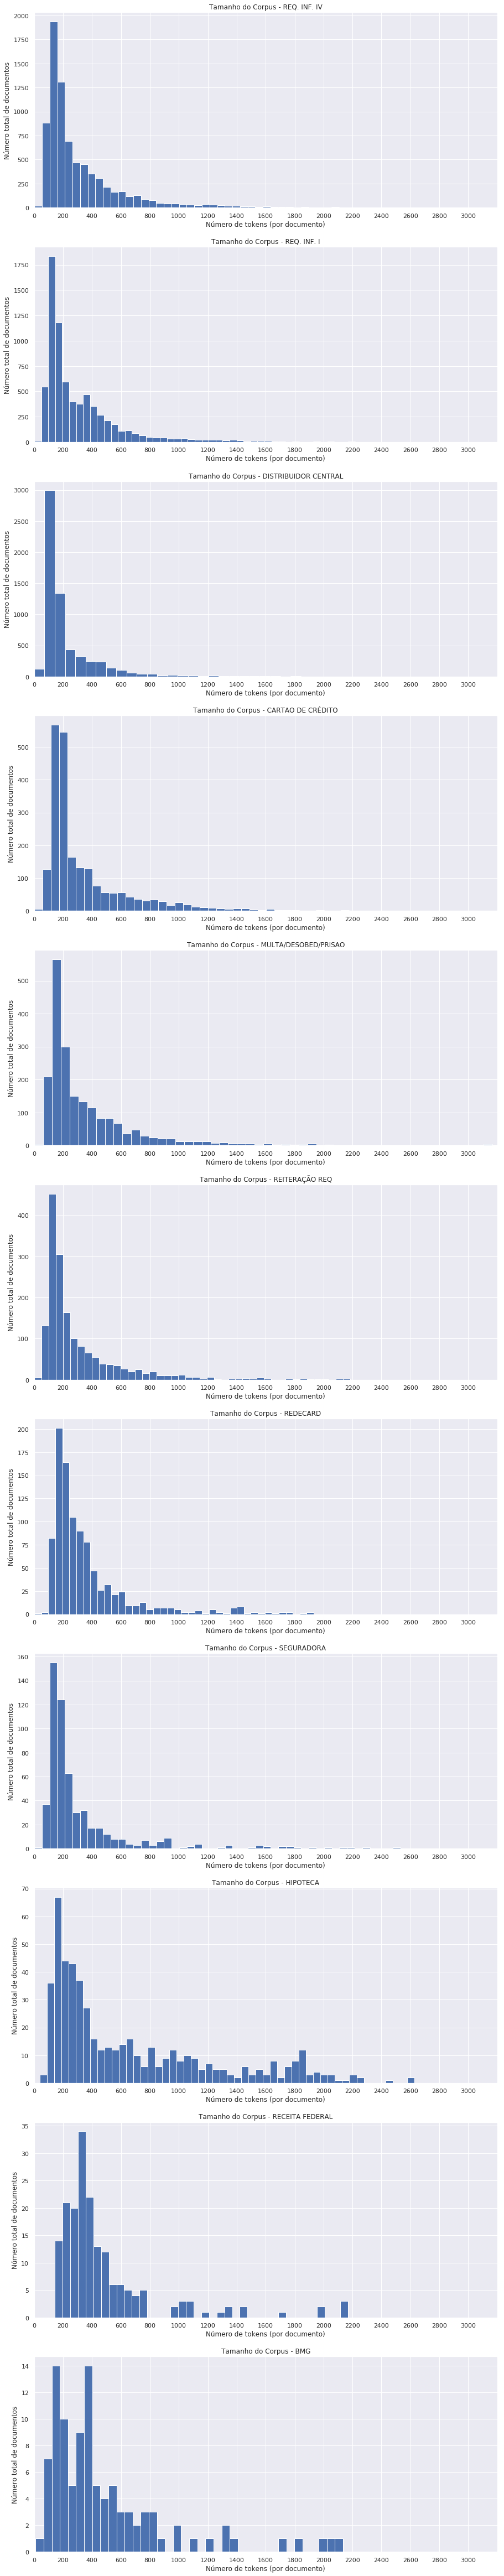

In [13]:

x_min = math.floor(min(df_requisicoes['N_TOKENS']) / 100) * 100
x_max = math.ceil(max(df_requisicoes['N_TOKENS']) / 100) * 100
x_step = 200

fig, ax = plt.subplots(11, 1, figsize=(15, 50))
fig.subplots_adjust(top=1.4)
for i, carteira in enumerate(sorted(classes, key=get_size, reverse=True)):
    n_bins = 2 * len(set(df_requisicoes[df_requisicoes['CARTEIRA'] == carteira]['N_TOKENS'].apply(lambda x: round(x / 100) * 100)))
    ax[i].set(xlim=(x_min, x_max))
    ax[i].hist(df_requisicoes[df_requisicoes['CARTEIRA'] == carteira]['N_TOKENS'], bins=n_bins, align='mid')
    ax[i].set_xticks(range(x_min, x_max, x_step))

    ax[i].set_title('Tamanho do Corpus - {}'.format(carteira))
    ax[i].set_xlabel('Número de tokens (por documento)');
    ax[i].set_ylabel('Número total de documentos');

In [14]:
# Normalizando o conteúdo dos documentos (tipo e tamanho)
def normalize_documents(df, column_name, type_value = str, threshold_text_length = 50):
    '''
    Função para tratar o conteúdo dos documentos que serão utilizados para treinamento da IA.
    ---
    Parâmetros:
        - df: dataframe onde foi instanciado os documentos;
        - column_name: coluna onde estão os textos dos documentos a serem avaliados;
        - type_value: tipo de conteúdo a ser filtrado na primeira validação
        - threshold_text_length: tamanho mínimo do conteúdo do documento (segunda validação)
    '''
   
    try:
        # 1. Remove registros onde o campo texto seja apenas do tipo string
        df_aux = df.loc[df[column_name].apply(type) == type_value]
        
        # 2. Remove registros onde o tamanho da string do campo texto seja menor < threshold
        df_aux = df_aux.loc[df_aux[column_name].apply(len) > threshold_text_length]
        
        return df_aux
    except:
        return False

In [17]:
# Normalizando documentos (tipagem e tamanho)
df_requisicoes = normalize_documents(df_requisicoes, 'TEXTO', type_value = str, threshold_text_length = 100)

In [48]:
full_corpus = list(set(wrd for lst in df_requisicoes['TEXTO'].apply(str.split) for wrd in lst))
len(full_corpus)

588444

In [123]:
corpus_dict = {}
df_struct = ['TOTAL', 'N_OCORRENCIAS']
df_struct.extend(classes)
for key in tqdm_notebook(classes):
    texts = df_requisicoes[df_requisicoes['CARTEIRA'] == key]['TEXTO']
    cnt = Counter([wrd for text in texts for wrd in text.split()])
    for wrd in cnt:
        if wrd in corpus_dict:
            corpus_dict[wrd][key] = cnt[wrd]
            corpus_dict[wrd]['TOTAL'] += cnt[wrd]
            corpus_dict[wrd]['N_OCORRENCIAS'] += 1
        else:
            corpus_dict[wrd] = dict((k, 0) for k in df_struct)
            corpus_dict[wrd][key] = cnt[wrd]
            corpus_dict[wrd]['N_OCORRENCIAS'] = 1
            corpus_dict[wrd]['TOTAL'] = cnt[wrd]

In [130]:
df_full_corpus = pd.DataFrame(corpus_dict).transpose()

In [131]:
aux = sorted(classes[:])
aux.extend(['N_OCORRENCIAS', 'TOTAL'])

print(aux)

df_full_corpus = df_full_corpus[aux]

['BMG', 'CARTAO DE CRÉDITO', 'DISTRIBUIDOR CENTRAL', 'HIPOTECA', 'MULTA/DESOBED/PRISAO', 'RECEITA FEDERAL', 'REDECARD', 'REITERAÇÃO REQ', 'REQ. INF. I', 'REQ. INF. IV', 'SEGURADORA', 'N_OCORRENCIAS', 'TOTAL']


In [134]:
df_full_corpus.head(10)

,BMG,CARTAO DE CRÉDITO,DISTRIBUIDOR CENTRAL,HIPOTECA,MULTA/DESOBED/PRISAO,RECEITA FEDERAL,REDECARD,REITERAÇÃO REQ,REQ. INF. I,REQ. INF. IV,SEGURADORA,N_OCORRENCIAS,TOTAL
recebemos,28,818,538,176,394,74,399,230,973,988,86,11,4704
expedicao,68,1388,1481,477,978,151,1184,579,3144,3055,253,11,12758
ceic,39,431,723,209,420,106,551,249,1210,1199,109,11,5246
gabriela,4,95,145,44,88,18,66,33,220,225,18,11,956
instituto,24,127,104,27,72,7,63,50,411,489,9,11,1383
nacional,26,502,290,187,237,36,131,171,1013,1069,62,11,3724
seguro,49,166,148,46,242,6,376,134,600,812,763,11,3342
social,37,110,361,101,279,100,133,153,929,1210,40,11,3453
oficio,269,4990,9705,1478,4754,119,1845,5300,14829,15961,1194,11,60444
sogp,4,0,0,0,0,0,0,0,0,6,2,3,12


In [214]:
df_aux = df_full_corpus.reset_index()
df_aux = df_aux.rename(columns={'index': 'TOKEN'})

In [230]:
df_filtered = df_aux.sort_values(by='TOTAL', ascending=False).head(100)

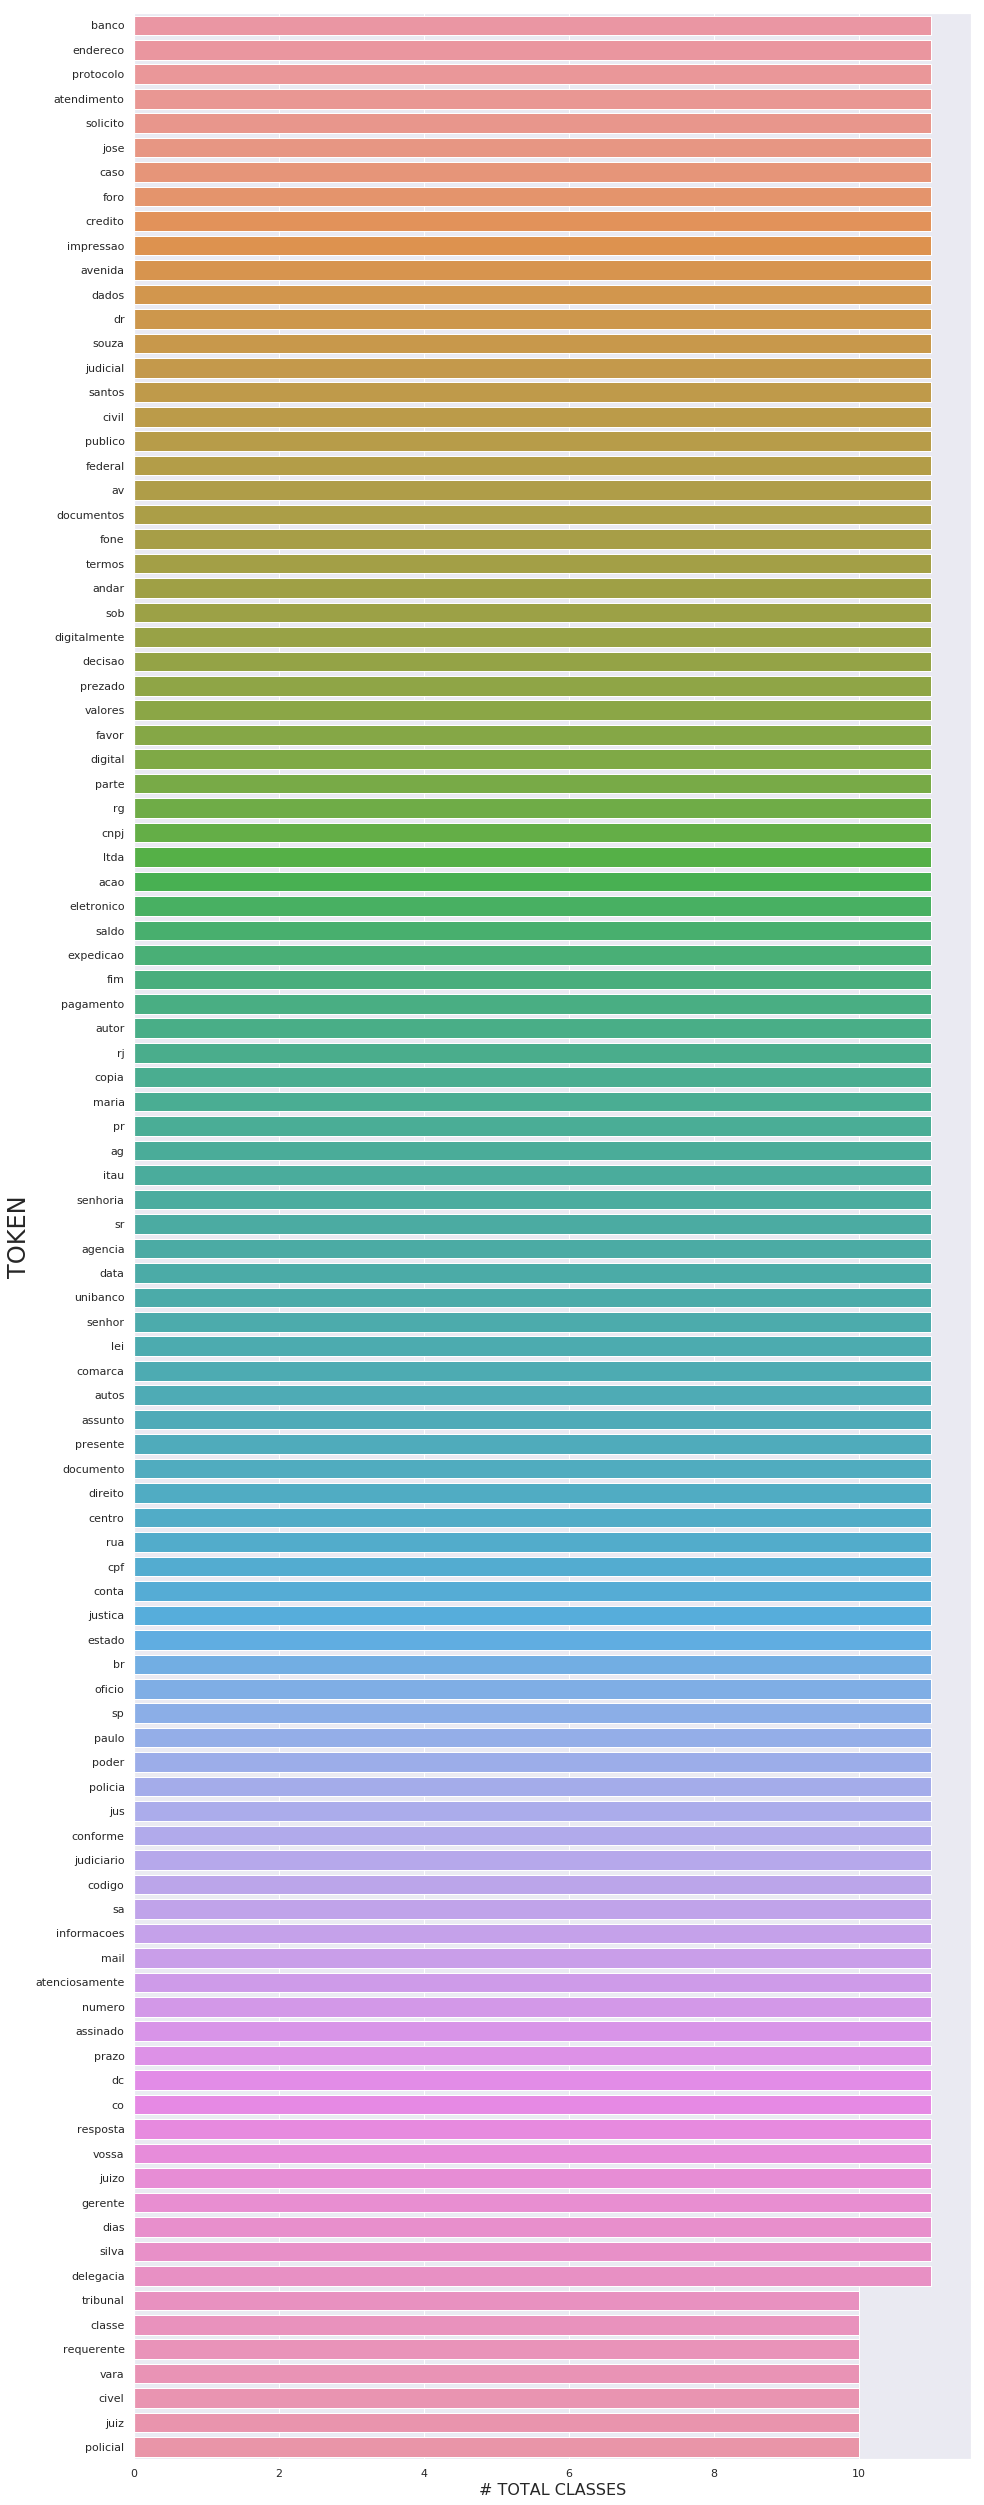

In [231]:
df_tokens = df_filtered.sort_values(by="N_OCORRENCIAS", ascending=False)
fig = plt.figure(figsize=(15,45))
sns.barplot(
   x="N_OCORRENCIAS", y="TOKEN", data=df_tokens
)
plt.xlabel('# TOTAL CLASSES', fontsize=16)
plt.ylabel('TOKEN', fontsize=24);